In [ ]:
from google.colab import auth
import gspread
from google.auth import default

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



from tensorflow.keras.metrics import RootMeanSquaredError as rmse

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open('demo').sheet1
rows = sheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})

In [ ]:
x = df[["input"]] .values
y = df[["output"]].values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ai_brain = Sequential([
    Dense(9,activation = 'relu',input_shape=[1]),
    Dense(19,activation = 'relu'),
    Dense(1),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')
ai_brain.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5166.2969
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 5164.2891
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5162.6753
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5161.2891
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 5159.8403
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 5158.0884
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5156.3804
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5154.8428
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5153.4019
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 5152.0278
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 5150.6797
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 5149.3164
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 5147.9175
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 5146.4658
Epoch 15/1000
1/1 ━━━━━━━━

<Axes: >

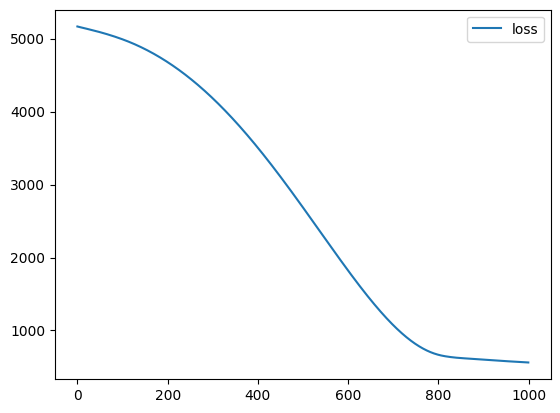

In [ ]:
loss_plot = pd.DataFrame(ai_brain.history.history)
loss_plot.plot()

In [ ]:
err = rmse()
preds = ai_brain.predict(x_test)
err(y_test,preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=22.436281>

In [ ]:
x_n1 = [[28]]
x_n_n = scaler.transform(x_n1)
ai_brain.predict(x_n_n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[101.31847]], dtype=float32)

EXP2


In [ ]:
import os
import base64
import numpy as np
import tensorflow as tf

In [ ]:
data_path = "mnist.npz.zip"

In [ ]:
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)

In [ ]:
print(f"training_images is of type {type(training_images)}.\ntraining_labels is of type {type(training_labels)}\n")

In [ ]:
import os
import base64
import numpy as np
import tensorflow as tf


# Append data/mnist.npz to the previous path to get the full path
data_path = "mnist.npz.zip"

# Load data (discard test set)
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)

print(f"training_images is of type {type(training_images)}.\ntraining_labels is of type {type(training_labels)}\n")

# Inspect shape of the data
data_shape = training_images.shape

# Reload the images in case you run this cell multiple times

# Apply your function

class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        # Check if the accuracy is greater or equal to 0.995
        if logs.get('accuracy') >= 0.995:
            # Stop training once the above condition is met
            self.model.stop_training = True
            print("\nReached 99.5% accuracy so cancelling training!")
import tensorflow as tf

def convolutional_model():
    """Returns the compiled (but untrained) convolutional model.

    Returns:
        tf.keras.Model: The model which should implement convolutions.
    """

    ### START CODE HERE ###

    # Define the model


training_images is of type <class 'numpy.ndarray'>.
training_labels is of type <class 'numpy.ndarray'>



In [ ]:

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")
def reshape_and_normalize(images):
    """Reshapes the array of images and normalizes pixel values.

    Args:
        images (numpy.ndarray): The images encoded as numpy arrays

    Returns:
        numpy.ndarray: The reshaped and normalized images.
    """

    ### START CODE HERE ###

    # Reshape the images to add an extra dimension (at the right-most side of the array)
    images = images[..., np.newaxis]

    # Normalize pixel values
    images = images / 255.0

    ### END CODE HERE ###

    return images

There are 60000 examples with shape (28, 28)


In [ ]:
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)

In [ ]:
training_images = reshape_and_normalize(training_images)
print('Name: Shalini V           RegisterNumber: 212222240096      \n')
print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")

Name: Shalini V           RegisterNumber: 212222240096      

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


In [ ]:
import tensorflow as tf

In [ ]:
   model = tf.keras.models.Sequential([
        # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # Max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # Flatten layer to convert 2D outputs to 1D
        tf.keras.layers.Flatten(),
        # Dense layer with 64 units and ReLU activation
        tf.keras.layers.Dense(64, activation='relu'),
        # Output layer with 10 units (one for each class) and softmax activation
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    ### END CODE HERE ###

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
model = convolutional_model()
training_history = model.fit(training_images, training_labels, epochs=10, callbacks=[EarlyStoppingCallback()])


IndentationError: unexpected indent (<ipython-input-11-f0ffec050a8e>, line 22)

exp3

In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd


In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def train_val_datasets():
    """Creates training and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): training and validation datasets
    """


    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/horse-or-human.zip/',
        batch_size=32,
        image_size=(150,150),
        shuffle=True,
        seed=7
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/validation-horse-or-human.zip',
        batch_size=32,
        image_size=(150,150),
        shuffle=True,
        seed=7
    )


    return training_dataset, validation_dataset

In [5]:
path_inception = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file ='/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(include_top = False,
                                input_shape = (150, 150, 3),
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layers.trainable = False

In [7]:
pre_trained_model.summary()
print('Name: shalini v     Register Number: 212222240096')

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 74, 74, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 74, 74, 32)     │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 74, 74, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 72, 72, 32)     │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 72, 72, 32)     │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 72, 72, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 72, 72, 64)     │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 72, 72, 64)     │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 72, 72, 64)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 35, 35, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 35, 35, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 35, 35, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

Name: shalini v     Register Number: 212222240096


In [21]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [10]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.970:
            self.model.stop_training = True
            print("\nReached 97.0% accuracy so cancelling training!")

In [11]:
def output_of_last_layer(pre_trained_model):
    """Fetches the output of the last desired layer of the pre-trained model

    Args:
        pre_trained_model (tf.keras.Model): pre-trained model

    Returns:
        tf.keras.KerasTensor: last desired layer of pretrained model
    """


    last_desired_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_desired_layer.output

    print('last layer output shape: ', last_output.shape)



    return last_output


In [12]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop

In [13]:
def create_final_model(pre_trained_model, last_output):

    x = tf.keras.layers.Flatten()(last_output)

    x = tf.keras.layers.Dense(1024, activation='relu')(x)

    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [14]:

model = create_final_model(pre_trained_model, last_output)

In [15]:
path_horse_or_human = '/content/horse-or-human.zip'

path_validation_horse_or_human = '/content/validation-horse-or-human.zip'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()


In [16]:

model.summary()
print("Name: shalini v Reg No: 212222240096")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 74, 74, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 74, 74, 32)     │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 74, 74, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 72, 72, 32)     │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 72, 72, 32)     │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 72, 72, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 72, 72, 64)     │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 72, 72, 64)     │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 72, 72, 64)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 35, 35, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 35, 35, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 35, 35, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 47,493,665 (181.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

Name: shalini v Reg No: 212222240096


In [17]:
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

500
527
128
128


In [18]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  height_shift_range = 0.2,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rotation_range = 0.4,
                                  shear_range = 0.1,
                                  zoom_range = 0.3,
                                  fill_mode = 'nearest'
                                  )

test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   shuffle = True)

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary',
                                                        shuffle = False)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
callbacks = EarlyStoppingCallback()
history = model.fit(train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 - 257s - 5s/step - accuracy: 0.8442 - loss: 0.4515 - val_accuracy: 0.9297 - val_loss: 0.1741
Epoch 2/100

Reached 97.0% accuracy so cancelling training!
52/52 - 245s - 5s/step - accuracy: 0.9718 - loss: 0.1818 - val_accuracy: 0.9023 - val_loss: 0.2562


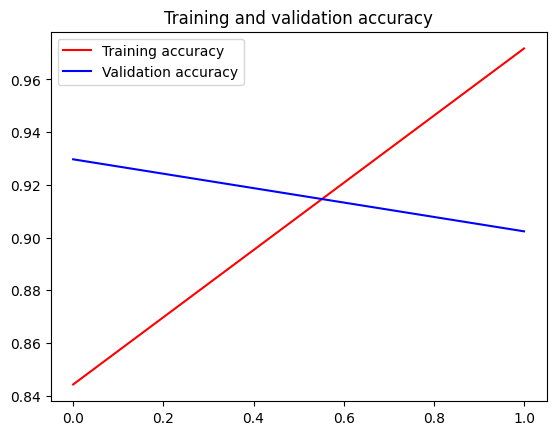

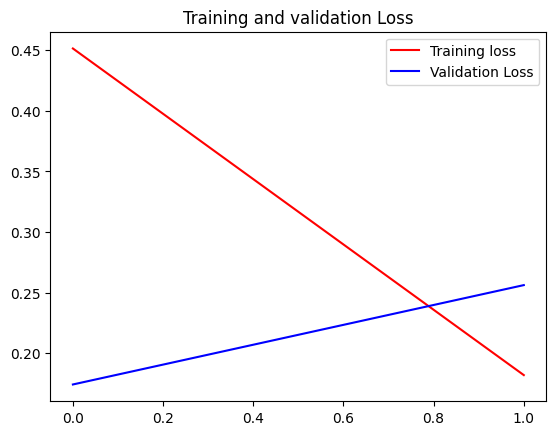

<Figure size 640x480 with 0 Axes>

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Name: shalini v      Register Number: 212222240096    ')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Name: shalini v       Register Number: 212222240096   ')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model = create_final_model(pre_trained_model, last_output)

total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 9,764,770 total parameters in this model.
There are 9,745,954 trainable parameters in this model.


In [ ]:
model = create_final_model(pre_trained_model, last_output)

total_params = model.count_params()
print(f"Total parameters: {total_params}")


Total parameters: 9764770
